#####IMPORT LIBRARY



In [ ]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (20, 10), 'figure.dpi': 120})

#IMPORT DATA

 **อ่านข้อมูลที่มีเวลาเกี่ยวข้องเพื่อเตรียมทำข้อมูลให้เป็น Time Series**

In [ ]:
df_1 = pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/datetime.tsv')
df_1.head(10)

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,28/11/16,28-11-16,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,7/8/16,7-8-16,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True
2,10/6/16,10-6-16,6/10/16,2016-06-10,10-Jun-2016,"Jun 10, 2016",2016-06,20160610,201606100707,11:52 AM,2016,6,10,M,water,45,False
3,26/3/16,26-3-16,3/26/16,2016-03-26,26-Mar-2016,"Mar 26, 2016",2016-03,20160326,201603261013,5:54 AM,2016,3,26,F,water,41,False
4,26/7/17,26-7-17,7/26/17,2017-07-26,26-Jul-2017,"Jul 26, 2017",2017-07,20170726,201707260705,1:40 AM,2017,7,26,F,tea,33,True
5,20/5/15,20-5-15,5/20/15,2015-05-20,20-May-2015,"May 20, 2015",2015-05,20150520,201505201154,2:09 AM,2015,5,20,M,pepsi,50,True
6,10/8/16,10-8-16,8/10/16,2016-08-10,10-Aug-2016,"Aug 10, 2016",2016-08,20160810,201608102129,10:49 AM,2016,8,10,M,water,48,True
7,18/2/15,18-2-15,2/18/15,2015-02-18,18-Feb-2015,"Feb 18, 2015",2015-02,20150218,201502182201,2:03 AM,2015,2,18,F,pepsi,40,False
8,6/2/16,6-2-16,2/6/16,2016-02-06,06-Feb-2016,"Feb 6, 2016",2016-02,20160206,201602062333,4:54 PM,2016,2,6,M,coke,36,False
9,4/8/15,4-8-15,8/4/15,2015-08-04,04-Aug-2015,"Aug 4, 2015",2015-08,20150804,201508040100,8:16 AM,2015,8,4,M,juice,35,False


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date_stamp   10 non-null     object
 1   date_stamp2  10 non-null     object
 2   date_stamp3  10 non-null     object
 3   iso_date     10 non-null     object
 4   fmt1         10 non-null     object
 5   fmt2         10 non-null     object
 6   ym           10 non-null     object
 7   ymd          10 non-null     int64 
 8   ymdhm        10 non-null     int64 
 9   tm           10 non-null     object
 10  y            10 non-null     int64 
 11  m            10 non-null     int64 
 12  d            10 non-null     int64 
 13  gender       10 non-null     object
 14  menu         10 non-null     object
 15  price        10 non-null     int64 
 16  member       10 non-null     bool  
dtypes: bool(1), int64(6), object(10)
memory usage: 1.4+ KB


 **เปลี่ยนชนิดข้อมูลที่ต้องการทำเป็น index ให้เป็นชนิด datetime**

In [ ]:
#df_1['date_stamp'] = pd.to_datetime(df_1['date_stamp'], format='mixed')
df_1['date_stamp'] = pd.to_datetime(df_1.date_stamp, format='mixed')
df_1

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,2016-11-28,28-11-16,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,2016-07-08,7-8-16,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True
2,2016-10-06,10-6-16,6/10/16,2016-06-10,10-Jun-2016,"Jun 10, 2016",2016-06,20160610,201606100707,11:52 AM,2016,6,10,M,water,45,False
3,2016-03-26,26-3-16,3/26/16,2016-03-26,26-Mar-2016,"Mar 26, 2016",2016-03,20160326,201603261013,5:54 AM,2016,3,26,F,water,41,False
4,2017-07-26,26-7-17,7/26/17,2017-07-26,26-Jul-2017,"Jul 26, 2017",2017-07,20170726,201707260705,1:40 AM,2017,7,26,F,tea,33,True
5,2015-05-20,20-5-15,5/20/15,2015-05-20,20-May-2015,"May 20, 2015",2015-05,20150520,201505201154,2:09 AM,2015,5,20,M,pepsi,50,True
6,2016-10-08,10-8-16,8/10/16,2016-08-10,10-Aug-2016,"Aug 10, 2016",2016-08,20160810,201608102129,10:49 AM,2016,8,10,M,water,48,True
7,2015-02-18,18-2-15,2/18/15,2015-02-18,18-Feb-2015,"Feb 18, 2015",2015-02,20150218,201502182201,2:03 AM,2015,2,18,F,pepsi,40,False
8,2016-06-02,6-2-16,2/6/16,2016-02-06,06-Feb-2016,"Feb 6, 2016",2016-02,20160206,201602062333,4:54 PM,2016,2,6,M,coke,36,False
9,2015-04-08,4-8-15,8/4/15,2015-08-04,04-Aug-2015,"Aug 4, 2015",2015-08,20150804,201508040100,8:16 AM,2015,8,4,M,juice,35,False


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_stamp   10 non-null     datetime64[ns]
 1   date_stamp2  10 non-null     object        
 2   date_stamp3  10 non-null     object        
 3   iso_date     10 non-null     object        
 4   fmt1         10 non-null     object        
 5   fmt2         10 non-null     object        
 6   ym           10 non-null     object        
 7   ymd          10 non-null     int64         
 8   ymdhm        10 non-null     int64         
 9   tm           10 non-null     object        
 10  y            10 non-null     int64         
 11  m            10 non-null     int64         
 12  d            10 non-null     int64         
 13  gender       10 non-null     object        
 14  menu         10 non-null     object        
 15  price        10 non-null     int64         
 16  member     

In [ ]:
df_1.columns

Index(['date_stamp', 'date_stamp2', 'date_stamp3', 'iso_date', 'fmt1', 'fmt2',
       'ym', 'ymd', 'ymdhm', 'tm', 'y', 'm', 'd', 'gender', 'menu', 'price',
       'member'],
      dtype='object')

  **การกำหนดให้คอลัมน์ชนิด datetime เป็น index ของข้อมูล**

In [ ]:
df_1.set_index("date_stamp")

,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
date_stamp,,,,,,,,,,,,,,,,
2016-11-28,28-11-16,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
2016-07-08,7-8-16,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True
2016-10-06,10-6-16,6/10/16,2016-06-10,10-Jun-2016,"Jun 10, 2016",2016-06,20160610,201606100707,11:52 AM,2016,6,10,M,water,45,False
2016-03-26,26-3-16,3/26/16,2016-03-26,26-Mar-2016,"Mar 26, 2016",2016-03,20160326,201603261013,5:54 AM,2016,3,26,F,water,41,False
2017-07-26,26-7-17,7/26/17,2017-07-26,26-Jul-2017,"Jul 26, 2017",2017-07,20170726,201707260705,1:40 AM,2017,7,26,F,tea,33,True
2015-05-20,20-5-15,5/20/15,2015-05-20,20-May-2015,"May 20, 2015",2015-05,20150520,201505201154,2:09 AM,2015,5,20,M,pepsi,50,True
2016-10-08,10-8-16,8/10/16,2016-08-10,10-Aug-2016,"Aug 10, 2016",2016-08,20160810,201608102129,10:49 AM,2016,8,10,M,water,48,True
2015-02-18,18-2-15,2/18/15,2015-02-18,18-Feb-2015,"Feb 18, 2015",2015-02,20150218,201502182201,2:03 AM,2015,2,18,F,pepsi,40,False
2016-06-02,6-2-16,2/6/16,2016-02-06,06-Feb-2016,"Feb 6, 2016",2016-02,20160206,201602062333,4:54 PM,2016,2,6,M,coke,36,False


In [ ]:
# Time series data source: read data and set columns 'date' to be index

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [ ]:
df.head(20)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


#การแสดงข้อมูลอนุกรมเวลา

In [ ]:
# Read data and set date column to be index
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
#Not set date column to be index
df_test = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
df_test

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


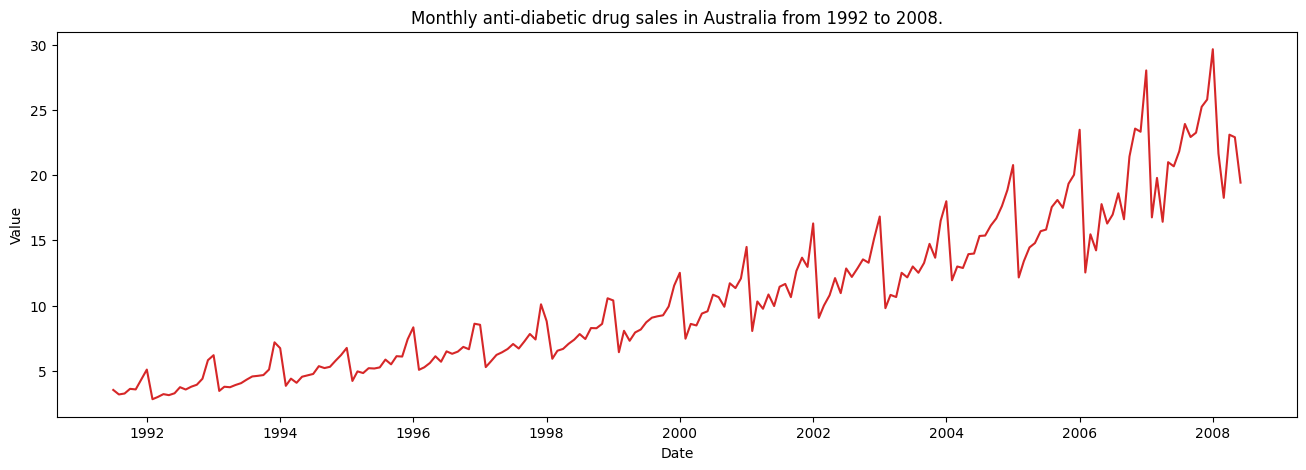

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

##การแสดงข้อมูลอนุกรมเวลาโดยเน้นการเติบโต

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )


# Draw Plot
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Value', dpi=100):
    plt.figure(figsize=(12,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates=['Month'])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


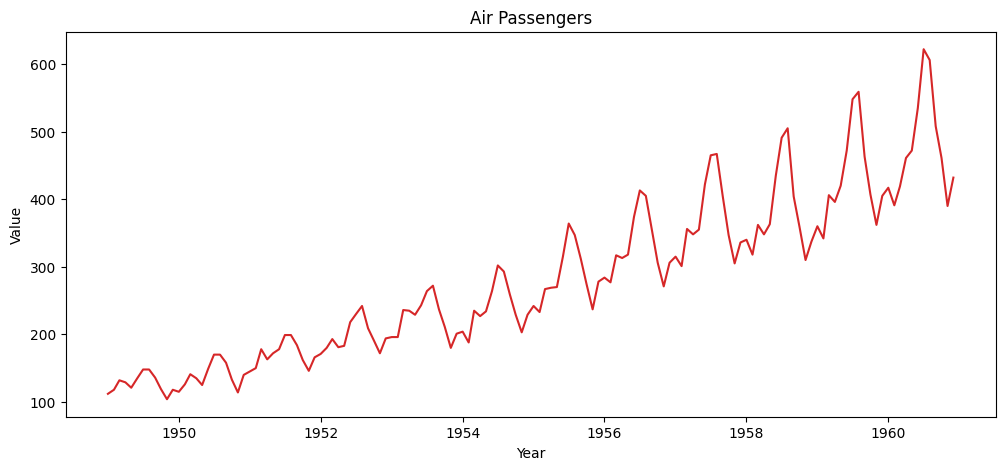

In [ ]:
#plot graph
x = df['Month'].values
y1 = df['#Passengers'].values
plot_df(df, x, y1, title='Air Passengers')

In [ ]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates=['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


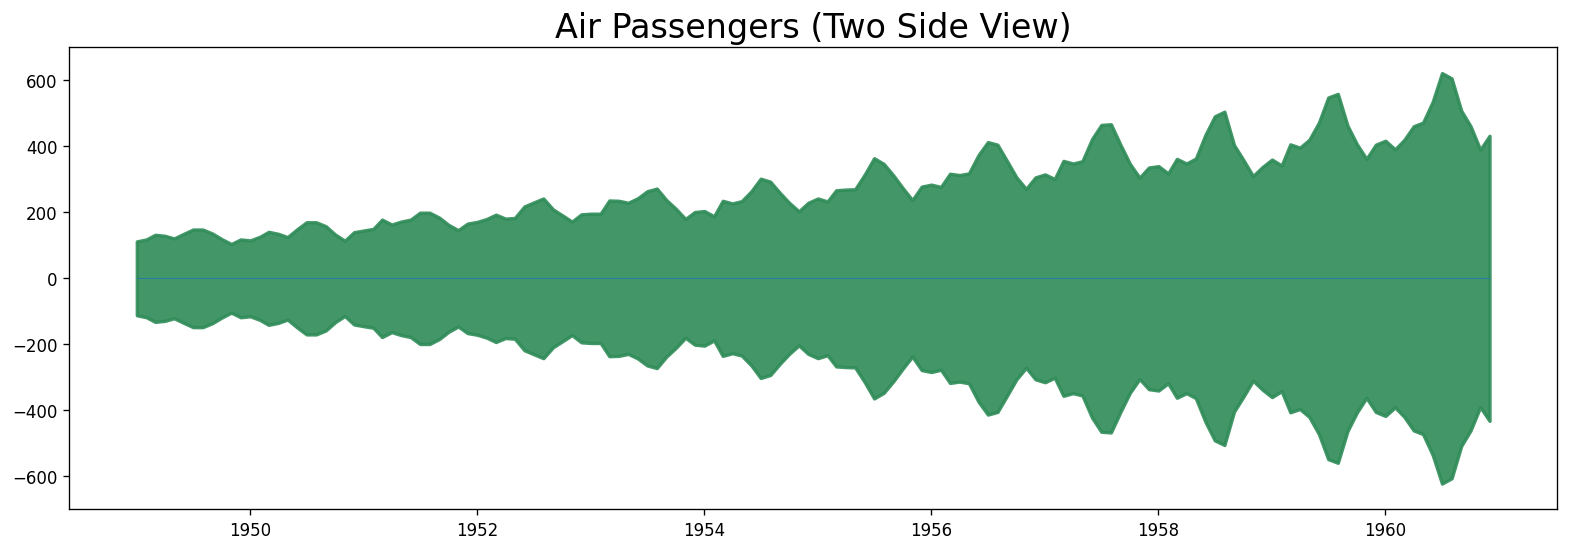

In [ ]:
x = df['Month'].values
y1 = df['#Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.9, linewidth=2, color='seagreen')
plt.ylim(-700, 700)
plt.title('Air Passengers (Two Side View)', fontsize=20)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth=0.5)
plt.show()

##การแสดงผลของฤดูกาล

In [ ]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [ ]:
#ปรับ index ข้อมูลโดยไม่ใช้ date column เป็น index แต่ให้ใช้ implicit index แทน
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [ ]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [ ]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


In [ ]:
# Prep Colors for draw in graph
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue', 'xkcd:lemon', 'xkcd:bluish grey',
       'xkcd:dark blue grey', 'xkcd:pale violet', 'xkcd:orangey yellow',
       'xkcd:cool grey', 'xkcd:green', 'xkcd:ice'], dtype='<U31')

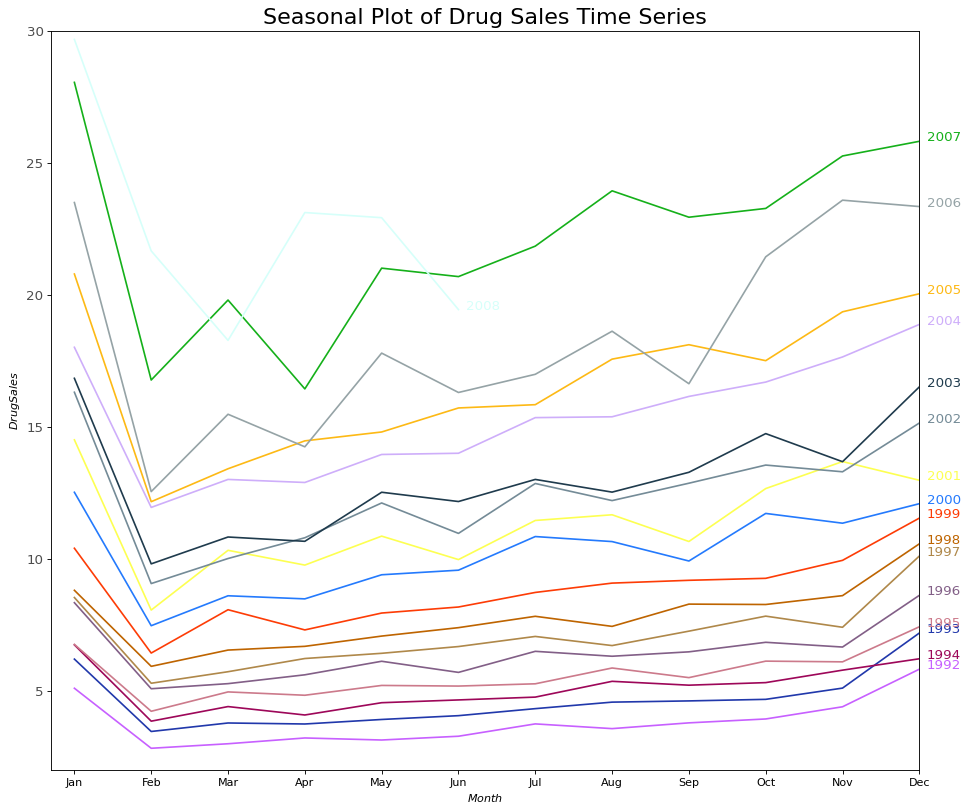

In [ ]:
# Draw Plot
plt.figure(figsize=(14,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

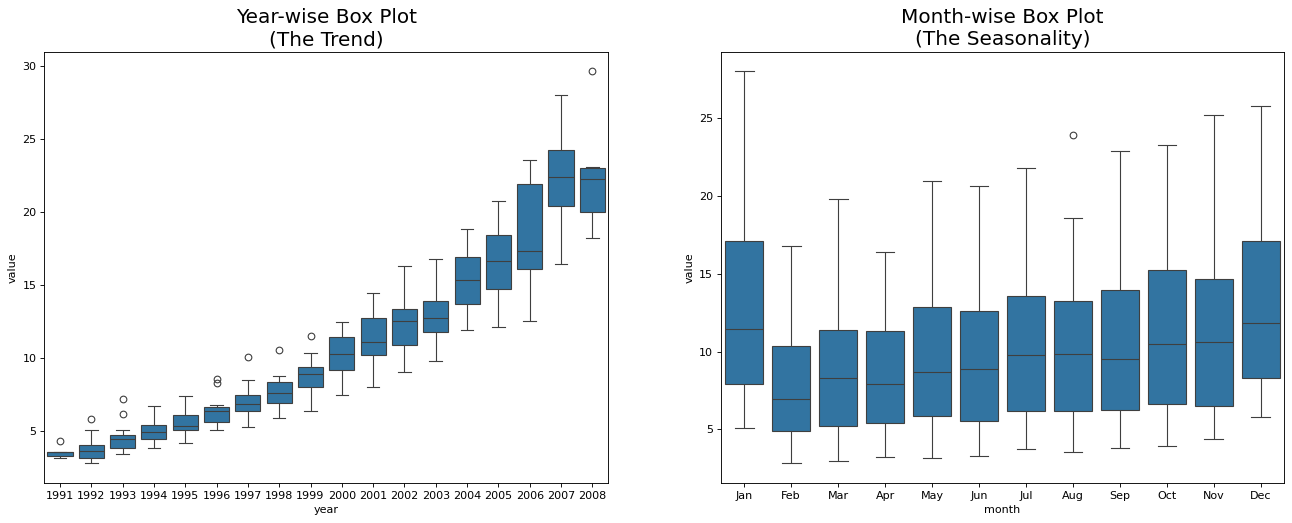

In [ ]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

#การหา PATTERN

In [ ]:
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

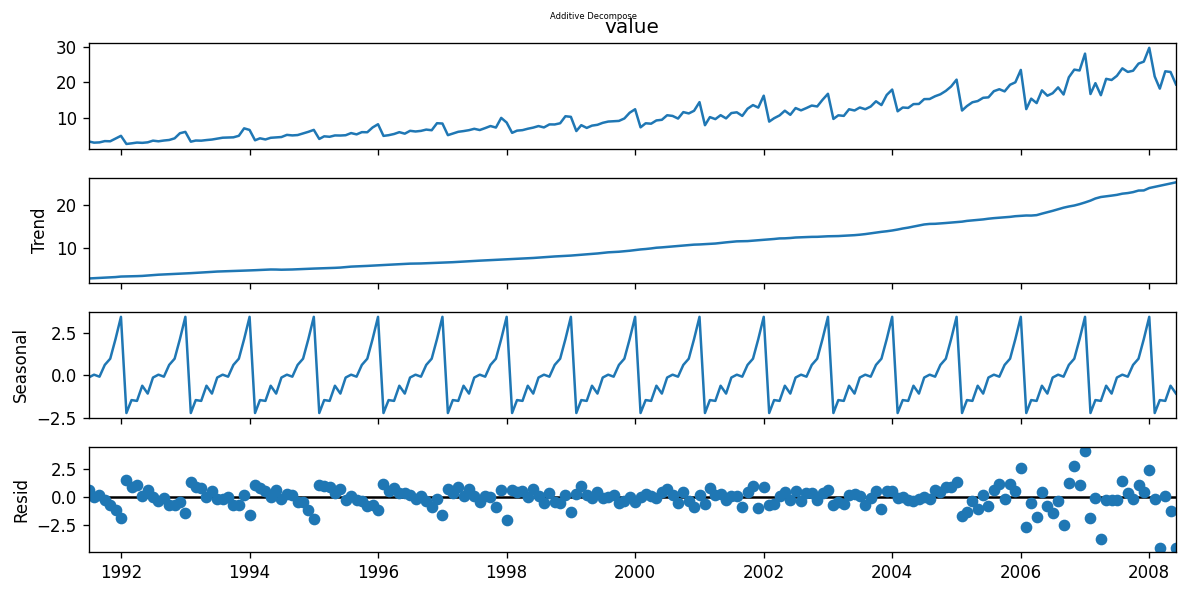

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=5)
plt.show()

In [ ]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,-0.140765,3.060085,0.607271,3.526591
1991-08-01,0.027747,3.124765,0.028379,3.180891
1991-09-01,-0.090361,3.189445,0.153137,3.252221
1991-10-01,0.602876,3.254125,-0.245998,3.611003
1991-11-01,0.970698,3.318805,-0.723634,3.565869


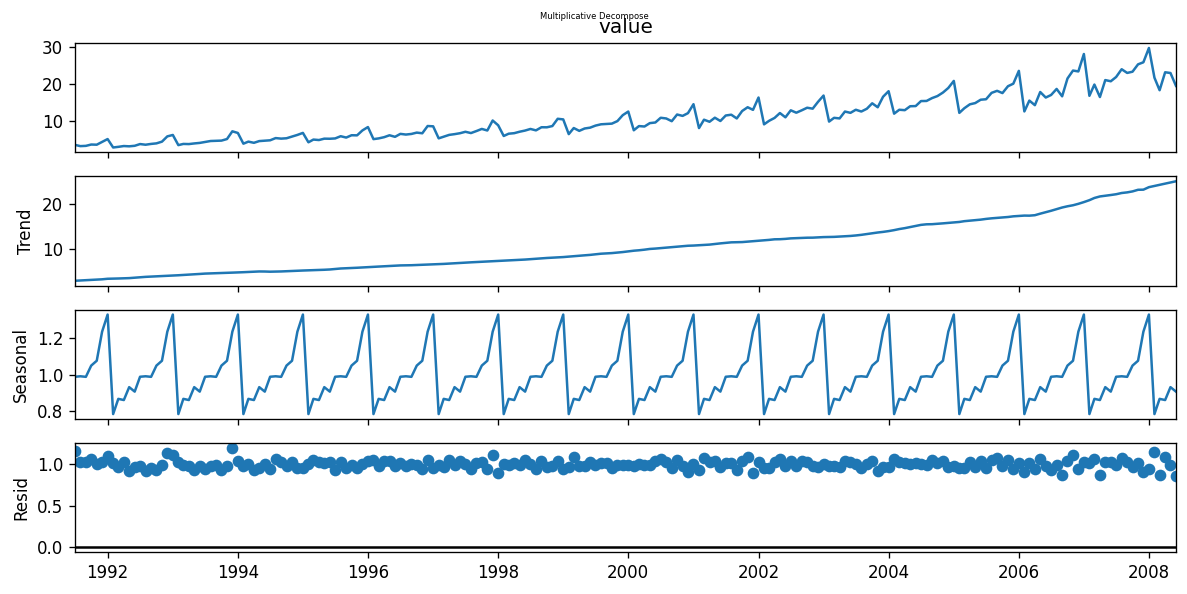

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (10,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=5)
plt.show()

In [ ]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869
